Confusion Matrix:
[[1 0]
 [0 2]]

Classification Report:
              precision    recall  f1-score   support

          No       1.00      1.00      1.00         1
         Yes       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

Accuracy: 100.00%
Error Rate: 0.00%


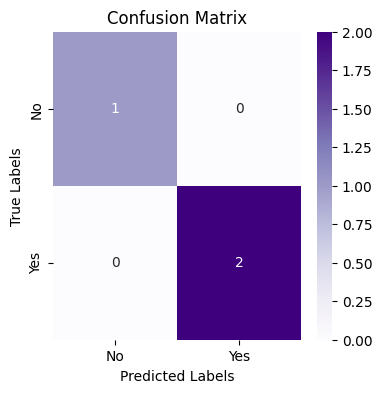

In [14]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder  # This line is added to import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('PlayTennis.csv')
# Separate features and target variable
label_encoders = {}
# Store the original target column name
target_column = 'Play Tennis'
# Drop the target column before encoding to avoid encoding it
X = df.drop(target_column, axis=1)
y = df[target_column]
for column in X.columns: # Iterate through features only
    if X[column].dtype == 'object':
        le = LabelEncoder()
        X[column] = le.fit_transform(X[column])
        label_encoders[column] = le
# Now X contains only the features, and y contains the target variable

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the model
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
class_report = classification_report(y_test, y_pred)

# Display performance metrics
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Error Rate: {error_rate * 100:.2f}%")

# Plot the confusion matrix
plt.figure(figsize=(4,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Purples", xticklabels=df[target_column].unique(), yticklabels=df[target_column].unique()) # Use original target column name
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()